In [1]:
# Siamese Architecture for face recognition

import random
import numpy as np
import time
import tensorflow as tf
import math
import pdb
import sys
import scipy.io as sio
from sklearn import *
import matplotlib.pyplot as plt
import os

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.


In [2]:
def Plot_ROC_Fn(label,distance,save_path):

    fpr, tpr, thresholds = metrics.roc_curve(label, distance, pos_label=1)
    AUC = metrics.roc_auc_score(label, distance, average='macro', sample_weight=None)
    # AP = metrics.average_precision_score(label, -distance, average='macro', sample_weight=None)

    # Calculating EER
    intersect_x = fpr[np.abs(fpr - (1 - tpr)).argmin(0)]
    EER = intersect_x
    print("EER = ", float(("{0:.%ie}" % 1).format(intersect_x)))

    # AUC(area under the curve) calculation
    print("AUC = ", float(("{0:.%ie}" % 1).format(AUC)))

    # # AP(average precision) calculation.
    # # This score corresponds to the area under the precision-recall curve.
    # print("AP = ", float(("{0:.%ie}" % 1).format(AP)))

    # Plot the ROC
    fig = plt.figure()
    ax = fig.gca()
    lines = plt.plot(fpr, tpr, label='ROC Curve')
    plt.setp(lines, linewidth=2, color='r')
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    plt.title('ROC.jpg')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # # Cutting the floating number
    # AUC = '%.2f' % AUC
    # EER = '%.2f' % EER
    # # AP = '%.2f' % AP
    #
    # # Setting text to plot
    # # plt.text(0.5, 0.6, 'AP = ' + str(AP), fontdict=None)
    # plt.text(0.5, 0.5, 'AUC = ' + str(AUC), fontdict=None)
    # plt.text(0.5, 0.4, 'EER = ' + str(EER), fontdict=None)
    plt.grid()
    plt.show()
    fig.savefig(save_path)

In [7]:
def Plot_PR_Fn(label,distance,save_path):

    precision, recall, thresholds = metrics.precision_recall_curve(label, distance, pos_label=1, sample_weight=None)
    AP = metrics.average_precision_score(label, distance, average='macro', sample_weight=None)

    # AP(average precision) calculation.
    # This score corresponds to the area under the precision-recall curve.
    print("AP = ", float(("{0:.%ie}" % 1).format(AP)))

    # Plot the ROC
    fig = plt.figure()
    ax = fig.gca()
    lines = plt.plot(recall, precision, label='ROC Curve')
    plt.setp(lines, linewidth=2, color='r')
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    plt.title(save_path + '_' + 'PR.jpg')
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    # Cutting the floating number
    AP = '%.2f' % AP

    # Setting text to plot
    # plt.text(0.5, 0.5, 'AP = ' + str(AP), fontdict=None)
    plt.grid()
    plt.show()
    fig.savefig(save_path)

In [4]:
def Plot_HIST_Fn(label,distance, save_path, num_bins = 50):

    dissimilarity = distance[:]
    gen_dissimilarity_original = []
    imp_dissimilarity_original = []
    for i in range(len(label)):
        if label[i] == 1:
            gen_dissimilarity_original.append(dissimilarity[i])
        else:
            imp_dissimilarity_original.append(dissimilarity[i])

    bins = np.linspace(np.amin(distance), np.amax(distance), num_bins)
    fig = plt.figure()
    plt.hist(gen_dissimilarity_original, bins, alpha=0.5, facecolor='blue', normed=False, label='gen_dist_original')
    plt.hist(imp_dissimilarity_original, bins, alpha=0.5, facecolor='red', normed=False, label='imp_dist_original')
    plt.legend(loc='upper right')
    plt.title('OriginalFeatures_Histogram.jpg')
    plt.show()
    fig.savefig(save_path)

In [5]:
evaluation_dir = '../../results/SCORES' # Directory where checkpoints and event logs are written to.
plot_dir = '../../results/PLOTS' # Directory where plots are saved to.

# Loading necessary data.
score = np.load(os.path.join(evaluation_dir,'score_vector.npy'))
label = np.load(os.path.join(evaluation_dir,'target_label_vector.npy'))
save_path_ROC = os.path.join(plot_dir,'ROC.jpg')
save_path_PR = os.path.join(plot_dir,'PR.jpg')
save_path_HIST = os.path.join(plot_dir,'HIST.jpg')


# Creating the path
if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)

EER =  0.62
AUC =  0.48


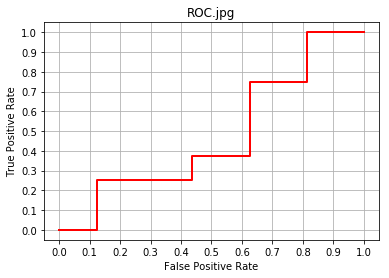

AP =  0.36


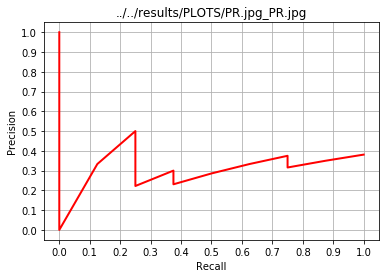

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


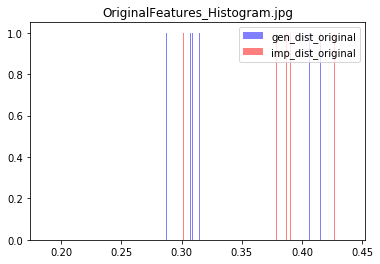

In [8]:
        
Plot_ROC_Fn(label,score,save_path_ROC)
Plot_PR_Fn(label,score,save_path_PR)


num_bins = 50 # Number of bins for plotting histogram.
Plot_HIST_Fn(label,score, save_path_HIST, num_bins)